In [1]:
# importing the libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# storing the dataset in data variable

data=pd.read_csv("titanic.csv")

In [3]:
# seeing the data 

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# checking the shape of data
data.shape

(418, 12)

In [5]:
# checking the data type and presence of null values in the data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Dropping the invalid columns 

data.drop(["PassengerId","Name","SibSp","Parch","Ticket","Fare","Cabin"],axis=1,inplace =True )

In [7]:
# seeing the data after dropping specific columns 

data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,34.5,Q
1,1,3,female,47.0,S
2,0,2,male,62.0,Q
3,0,3,male,27.0,S
4,1,3,female,22.0,S


In [8]:
# information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [9]:
# filling the null values in the age column

data["Age"]=data["Age"].fillna(method="ffill")

C:\Users\HP\AppData\Local\Temp\ipykernel_2688\2772092278.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Age"]=data["Age"].fillna(method="ffill")


In [10]:
# again seeing the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [11]:
# changing the data type of age column

data["Age"]=data["Age"].astype(int)

In [12]:
# againg seeing the data info..

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  418 non-null    int64 
 1   Pclass    418 non-null    int64 
 2   Sex       418 non-null    object
 3   Age       418 non-null    int32 
 4   Embarked  418 non-null    object
dtypes: int32(1), int64(2), object(2)
memory usage: 14.8+ KB


In [39]:
# drooping the duplicate values.

data.drop_duplicates(inplace=True)

In [40]:
data.shape

(263, 5)

## Survival rate by class

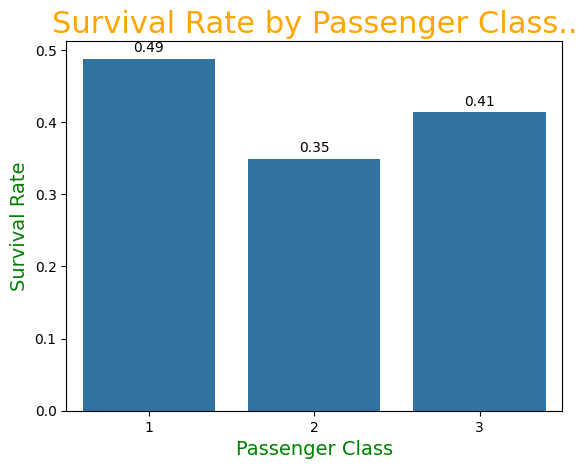

In [71]:
# showing the graph...

ax=sns.barplot(data=data,y="Survived",x="Pclass",errorbar=None)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",(p.get_x()+p.get_width()/2.,p.get_height()),
                ha="center",va="baseline",fontsize=10,color="black",xytext=(0,5),textcoords='offset points')
plt.title("Survival Rate by Passenger Class..",size=22,color="orange")
plt.ylabel("Survival Rate",size=14,color="g")
plt.xlabel("Passenger Class",size=14,color="g")
plt.show()

## Survival rate by age

C:\Users\HP\AppData\Local\Temp\ipykernel_2688\3208320028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x="Survived",y="Age",palette="Paired")


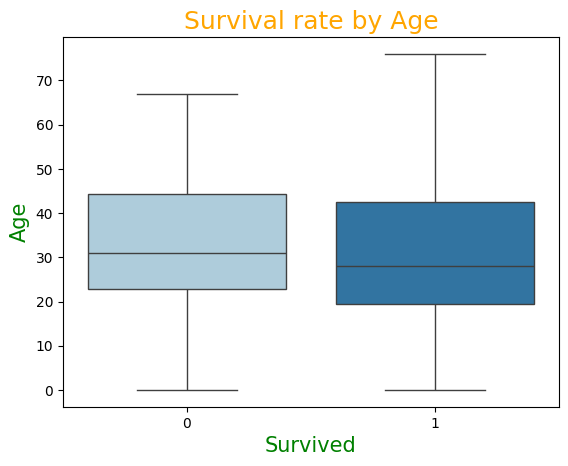

In [38]:
# graph 

sns.boxplot(data=data,x="Survived",y="Age",palette="Paired")
plt.title("Survival rate by Age",size=18,color="orange")
plt.xlabel("Survived",size=15,color="g")
plt.ylabel("Age",size=15,color="g")
plt.show()

## Survival rate by Sex

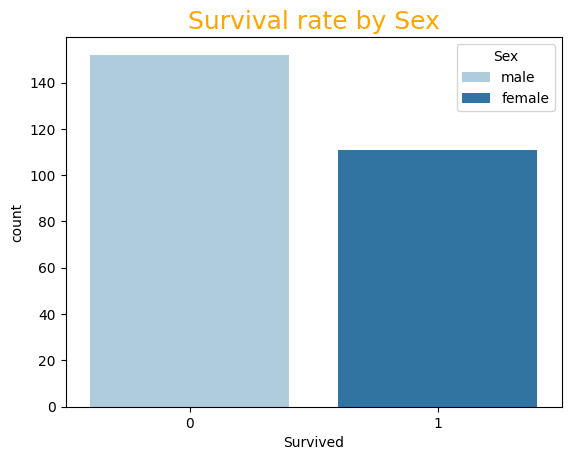

In [81]:
# garph

sns.countplot(data=data,x="Survived",hue="Sex",palette="Paired")
plt.title("Survival rate by Sex",size=18,color="orange")
plt.show()

## survival rate by embarked 

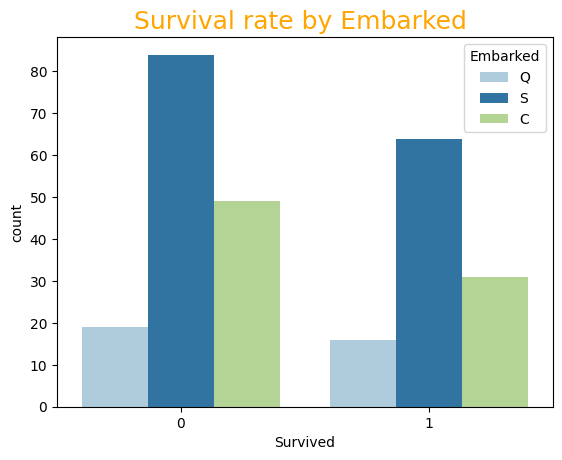

In [42]:
sns.countplot(data=data,x="Survived",hue="Embarked",palette="Paired")
plt.title("Survival rate by Embarked ",size=18,color="orange")
plt.show()


## Age distribution by class

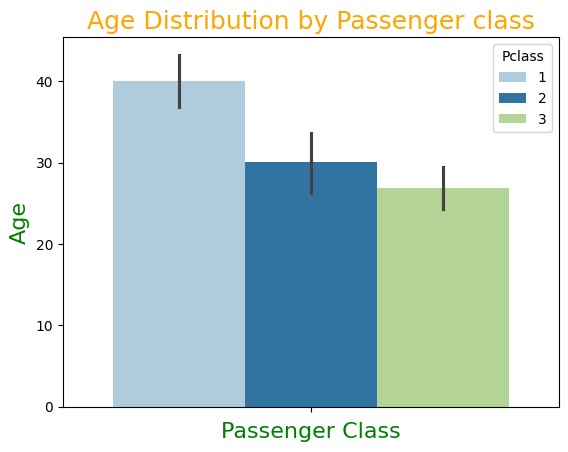

In [48]:
sns.barplot(data=data,y="Age",hue="Pclass",palette="Paired")
plt.title("Age Distribution by Passenger class",size=18,color="orange")
plt.ylabel("Age",size=16,color="g")
plt.xlabel("Passenger Class",size=16,color="g")
plt.show()
        

## Class distribution by Embarked

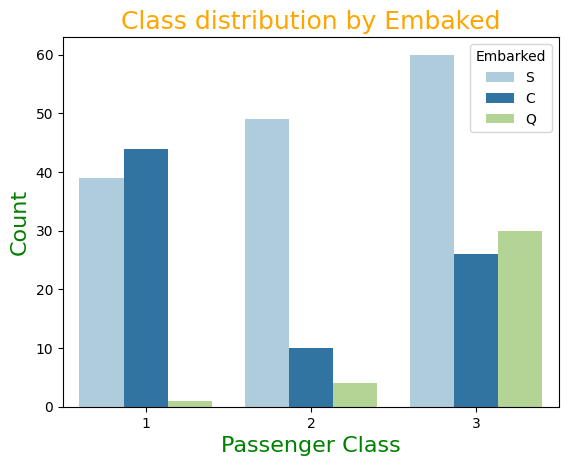

In [51]:
sns.countplot(data=data,x="Pclass",hue="Embarked",palette="Paired")
plt.title("Class distribution by Embaked",size=18,color="orange")
plt.ylabel("Count",size=16,color="g")
plt.xlabel("Passenger Class",size=16,color="g")
plt.show()

## Class distribution by Gender

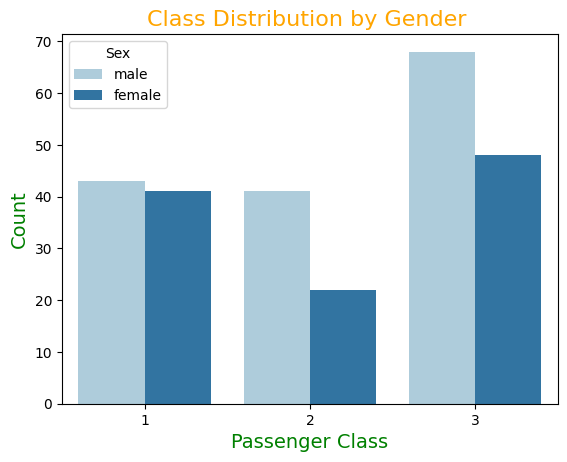

In [55]:
sns.countplot(data=data,x="Pclass",hue="Sex",palette="Paired")
plt.title("Class Distribution by Gender ",size=16,color="orange")
plt.xlabel("Passenger Class",size=14,color="g")
plt.ylabel("Count",size=14,color="g")
plt.show()